In [1]:
# ライブラリの読み込み
from __future__ import print_function
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F

データの読み込み

In [2]:
answer_csv=pd.read_csv("./300eff_vit_ensemble.csv",index_col=[0])
answer_csv

,effの予測(ラベル),effの予測(確率),vitの予測(ラベル),vitの予測(確率),eff+vitの平均での予測(ラベル),eff+vitの平均での予測(確率),真の値
0,0,"[0.8298153281211853, 0.16559021174907684, 0.00...",0,"[0.822282612323761, 0.16171005368232727, 0.016...",0,"[0.8260489702224731, 0.16365012526512146, 0.01...",0.0
1,2,"[1.8971013560076244e-06, 6.976411532377824e-05...",2,"[0.0003842241712845862, 0.00902486126869917, 0...",2,"[0.00019306063768453896, 0.00454731285572052, ...",2.0
2,1,"[0.0223302710801363, 0.7963219881057739, 0.181...",1,"[0.19346295297145844, 0.7509230375289917, 0.05...",1,"[0.10789661109447479, 0.7736225128173828, 0.11...",1.0
3,1,"[0.001360262860544026, 0.79609215259552, 0.202...",1,"[0.022471830248832703, 0.7585829496383667, 0.2...",1,"[0.01191604696214199, 0.7773375511169434, 0.21...",2.0
4,1,"[0.27628904581069946, 0.7232658863067627, 0.00...",1,"[0.19380536675453186, 0.7585581541061401, 0.04...",1,"[0.23504720628261566, 0.7409120202064514, 0.02...",0.0
...,...,...,...,...,...,...,...
295,1,"[0.0548819862306118, 0.9443324208259583, 0.000...",1,"[0.2601766288280487, 0.6506915092468262, 0.089...",1,"[0.1575293093919754, 0.7975119352340698, 0.044...",0.0
296,0,"[0.9962760210037231, 0.003718638326972723, 5.4...",0,"[0.8251708745956421, 0.15988685190677643, 0.01...",0,"[0.9107234477996826, 0.08180274814367294, 0.00...",1.0
297,2,"[7.583221304230392e-05, 0.009618956595659256, ...",2,"[0.001387667958624661, 0.3646685779094696, 0.6...",2,"[0.0007317501003853977, 0.18714377284049988, 0...",1.0
298,2,"[1.6724987972338567e-06, 7.511236617574468e-05...",2,"[0.0002839228545781225, 0.024668853729963303, ...",2,"[0.0001427976822014898, 0.012371983379125595, ...",2.0


In [3]:
def array_maker(csv,column_name):
    lst=[]
    for i in range(len(csv[column_name])):
        lst.append(eval(csv.loc[i,column_name]))
    return np.array(lst)

In [5]:
answer_csv

,effの予測(ラベル),effの予測(確率),vitの予測(ラベル),vitの予測(確率),eff+vitの平均での予測(ラベル),eff+vitの平均での予測(確率),真の値
0,0,"[0.8298153281211853, 0.16559021174907684, 0.00...",0,"[0.822282612323761, 0.16171005368232727, 0.016...",0,"[0.8260489702224731, 0.16365012526512146, 0.01...",0.0
1,2,"[1.8971013560076244e-06, 6.976411532377824e-05...",2,"[0.0003842241712845862, 0.00902486126869917, 0...",2,"[0.00019306063768453896, 0.00454731285572052, ...",2.0
2,1,"[0.0223302710801363, 0.7963219881057739, 0.181...",1,"[0.19346295297145844, 0.7509230375289917, 0.05...",1,"[0.10789661109447479, 0.7736225128173828, 0.11...",1.0
3,1,"[0.001360262860544026, 0.79609215259552, 0.202...",1,"[0.022471830248832703, 0.7585829496383667, 0.2...",1,"[0.01191604696214199, 0.7773375511169434, 0.21...",2.0
4,1,"[0.27628904581069946, 0.7232658863067627, 0.00...",1,"[0.19380536675453186, 0.7585581541061401, 0.04...",1,"[0.23504720628261566, 0.7409120202064514, 0.02...",0.0
...,...,...,...,...,...,...,...
295,1,"[0.0548819862306118, 0.9443324208259583, 0.000...",1,"[0.2601766288280487, 0.6506915092468262, 0.089...",1,"[0.1575293093919754, 0.7975119352340698, 0.044...",0.0
296,0,"[0.9962760210037231, 0.003718638326972723, 5.4...",0,"[0.8251708745956421, 0.15988685190677643, 0.01...",0,"[0.9107234477996826, 0.08180274814367294, 0.00...",1.0
297,2,"[7.583221304230392e-05, 0.009618956595659256, ...",2,"[0.001387667958624661, 0.3646685779094696, 0.6...",2,"[0.0007317501003853977, 0.18714377284049988, 0...",1.0
298,2,"[1.6724987972338567e-06, 7.511236617574468e-05...",2,"[0.0002839228545781225, 0.024668853729963303, ...",2,"[0.0001427976822014898, 0.012371983379125595, ...",2.0


In [6]:
# ViT,Effinetそれぞれの予測結果とテストデータの読み込み
classifier_csv=pd.read_csv("./300eff_vit_ensemble.csv",index_col=[0])
vit_prob=array_maker(classifier_csv, 'vitの予測(確率)')
testY=np.array(classifier_csv["真の値"])
eff_prob=array_maker(classifier_csv, "effの予測(確率)")

In [7]:
from sklearn.preprocessing import label_binarize

In [8]:
m = nn.Softmax(dim=1)
# アンサンブル用の確率
ensemble_prob=array_maker(classifier_csv, "eff+vitの平均での予測(確率)")
from sklearn.preprocessing import label_binarize
# ground truth をone-got エンコーディングする。
y_test_one_hot = label_binarize(testY,classes=[0,1,2])

In [9]:
len(ensemble_prob),len(y_test_one_hot[:,0])

(300, 300)

rocカーブの作成

In [10]:
from sklearn.metrics import roc_curve, auc
import pylab as p
n_classes = 3
fpr_vit = {}
fpr_eff = {}
fpr_ensemble = {}
fpr_expert1 = {}
fpr_expert2 = {}
fpr_expert3 = {}
tpr_vit = {}
tpr_eff = {}
tpr_ensemble = {}
tpr_expert1 = {}
tpr_expert2 = {}
tpr_expert3 = {}
roc_auc_vit = {}
roc_auc_eff = {}
roc_auc_ensemble = {}
roc_auc_expert1 = {}
roc_auc_expert2 = {}
roc_auc_expert3 = {}
for i in range(n_classes):
    # fpr=false positive rate, tpr=true positive rate
    fpr_vit[i], tpr_vit[i], _ = roc_curve(y_test_one_hot[:, i], vit_prob[:, i])
    fpr_eff[i], tpr_eff[i], _ = roc_curve(y_test_one_hot[:, i], eff_prob[:, i])
    fpr_ensemble[i], tpr_ensemble[i], _ = roc_curve(y_test_one_hot[:, i], ensemble_prob[:, i])
    
    roc_auc_vit[i] = auc(fpr_vit[i], tpr_vit[i])
    roc_auc_eff[i] = auc(fpr_eff[i], tpr_eff[i])
    roc_auc_ensemble[i] = auc(fpr_ensemble[i], tpr_ensemble[i])
    roc_auc_expert1[i] = auc(fpr_expert1[i], tpr_expert1[i])
    roc_auc_expert2[i] = auc(fpr_expert2[i], tpr_expert2[i])
    roc_auc_expert3[i] = auc(fpr_expert3[i], tpr_expert3[i])

AUCの結果

In [11]:
print(f'test_data=300\nvitのAUCは:{roc_auc_vit}\neffのAUCは:{roc_auc_eff}\nensembleのAUCは:{roc_auc_ensemble}')

test_data=300
vitのAUCは:{0: 0.88045, 1: 0.7654000000000001, 2: 0.9330499999999999}
effのAUCは:{0: 0.8709, 1: 0.7357, 2: 0.9492}
ensembleのAUCは:{0: 0.8913500000000001, 1: 0.7824, 2: 0.95025}
expert1のAUCは:{0: 0.7225, 1: 0.5175, 2: 0.7175}
expert2のAUCは:{0: 0.7224999999999999, 1: 0.58, 2: 0.7975}
expert3のAUCは:{0: 0.5425, 1: 0.5575, 2: 0.7}


class0に対するプロット

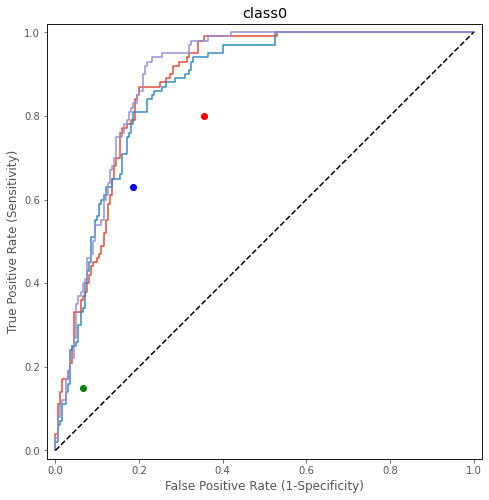

In [12]:
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['axes.facecolor'] = 'white'

%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8))
ax.set_box_aspect(1)


plt.plot(fpr_vit[0], tpr_vit[0])
plt.plot(fpr_eff[0], tpr_eff[0])
plt.plot(fpr_ensemble[0], tpr_ensemble[0])

plt.title(f'class{0}')
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")

    


ax.yaxis.set_ticks_position('left')
plt.plot([0, 1], [0, 1], 'k--')
ax.set_xlim(-0.02, 1.02)
ax.set_ylim(-0.02, 1.02)
ax.spines['bottom'].set_color('0.1')
ax.spines['top'].set_color('0.1')
ax.spines['right'].set_color('0.1')
ax.spines['left'].set_color('0.1')

fig.show()
fig.savefig("./roc_img/class0.png",edgecolor='b')

class1に対するプロット

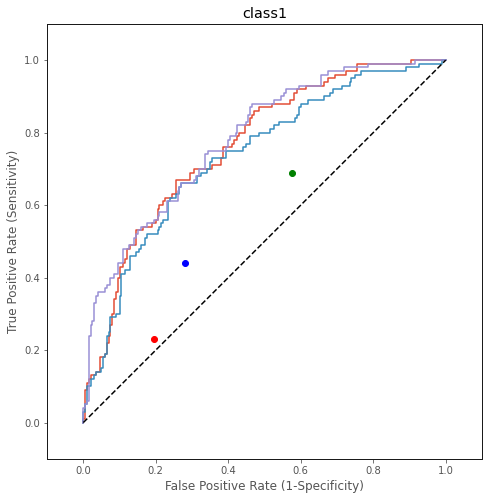

In [13]:

import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['axes.facecolor'] = 'white'
# print(roc_auc)
from itertools import cycle
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8))
ax.set_box_aspect(1)


plt.plot(fpr_vit[1], tpr_vit[1])
plt.plot(fpr_eff[1], tpr_eff[1])
plt.plot(fpr_ensemble[1], tpr_ensemble[1])
plt.title(f'class{1}')
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
p.gca().set_aspect('equal', adjustable='datalim')

    


ax.yaxis.set_ticks_position('left')
plt.plot([0, 1], [0, 1], 'k--')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.spines['bottom'].set_color('0.1')
ax.spines['top'].set_color('0.1')
ax.spines['right'].set_color('0.1')
ax.spines['left'].set_color('0.1')
fig.show()
fig.savefig("./roc_img/class1.png",edgecolor='b')

class2に対するプロット

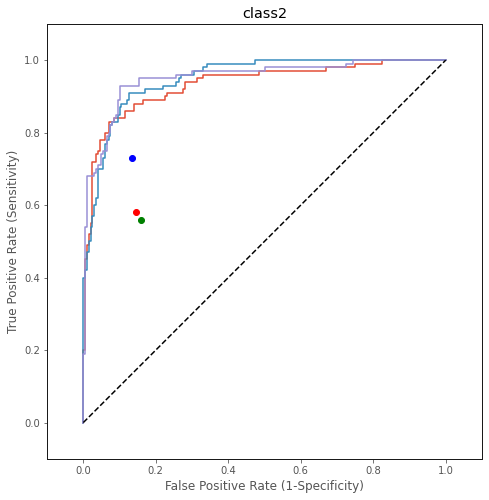

In [14]:
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['axes.facecolor'] = 'white'
# print(roc_auc)
from itertools import cycle
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8))
ax.set_box_aspect(1)


plt.plot(fpr_vit[2], tpr_vit[2])
plt.plot(fpr_eff[2], tpr_eff[2])
plt.plot(fpr_ensemble[2], tpr_ensemble[2])
plt.title(f'class{2}')
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
p.gca().set_aspect('equal', adjustable='datalim')

    


ax.yaxis.set_ticks_position('left')
plt.plot([0, 1], [0, 1], 'k--')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.spines['bottom'].set_color('0.1')
ax.spines['top'].set_color('0.1')
ax.spines['right'].set_color('0.1')
ax.spines['left'].set_color('0.1')
fig.show()
fig.savefig("./roc_img/class2.png",edgecolor='b')